# Prediction of Credit Risk using Machine Learning Models



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (confusion_matrix,accuracy_score,precision_score,recall_score,f1_score)

### Khai phá dữ liệu

In [ ]:
df= pd.read_csv('/content/credit_customers.csv')
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,...,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes,good
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,...,real estate,22.0,none,own,1.0,skilled,1.0,none,yes,bad
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,...,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes,good
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,...,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes,good
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,...,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes,bad


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   checking_status         1000 non-null   object 
 1   duration                1000 non-null   float64
 2   credit_history          1000 non-null   object 
 3   purpose                 1000 non-null   object 
 4   credit_amount           1000 non-null   float64
 5   savings_status          1000 non-null   object 
 6   employment              1000 non-null   object 
 7   installment_commitment  1000 non-null   float64
 8   personal_status         1000 non-null   object 
 9   other_parties           1000 non-null   object 
 10  residence_since         1000 non-null   float64
 11  property_magnitude      1000 non-null   object 
 12  age                     1000 non-null   float64
 13  other_payment_plans     1000 non-null   object 
 14  housing                 1000 non-null   o

In [ ]:
pip install pandas-profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df, title="Profiling Report for Credit Risk Dataset")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
 df.isna().sum()

checking_status           0
duration                  0
credit_history            0
purpose                   0
credit_amount             0
savings_status            0
employment                0
installment_commitment    0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
age                       0
other_payment_plans       0
housing                   0
existing_credits          0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
class                     0
dtype: int64

###Mã hoá dữ liệu

In [ ]:
# Mã hoá Onehot với những cột categorical
hot = pd.get_dummies(df[['credit_history', 'checking_status', 'purpose', 'savings_status',
                        'employment', 'personal_status', 'other_parties',
                        'installment_commitment', 'residence_since', 'property_magnitude',
                        'other_payment_plans', 'housing', 'existing_credits',
                        'job', 'num_dependents', 'own_telephone', 'foreign_worker']])
df = pd.concat([df, hot], axis = 1)
df = df.drop(['credit_history', 'checking_status', 'purpose', 'savings_status',
                        'employment', 'personal_status', 'other_parties',
                        'installment_commitment', 'residence_since', 'property_magnitude',
                        'other_payment_plans', 'housing', 'existing_credits',
                        'job', 'num_dependents', 'own_telephone', 'foreign_worker'], axis = 1)

In [ ]:
# Thay thế label Good và Bad cột target thành 1 và 0
df['class'] = df['class'].replace(['good', 'bad'], ['0', '1'])
df['class'] =df['class'].apply(pd.to_numeric, errors = 'coerce')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 58 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   duration                                       1000 non-null   float64
 1   credit_amount                                  1000 non-null   float64
 2   age                                            1000 non-null   float64
 3   class                                          1000 non-null   int64  
 4   credit_history_all paid                        1000 non-null   uint8  
 5   credit_history_critical/other existing credit  1000 non-null   uint8  
 6   credit_history_delayed previously              1000 non-null   uint8  
 7   credit_history_existing paid                   1000 non-null   uint8  
 8   credit_history_no credits/all paid             1000 non-null   uint8  
 9   checking_status_0<=X<200                       1000 n

In [ ]:
np.any(np.isnan(df['class']))

False

### Độ chính xác của các model trước khi tối ưu
1. Phân tách dữ liệu

In [ ]:
X = df.drop('class', axis = 1).values
y= df['class']

In [ ]:
# Phân tách dữ liệu trước khi tối ưu
from sklearn.model_selection import train_test_split
X_train_b4, X_testb4, y_train_b4, y_testb4 = train_test_split(X,y,test_size=0.3,random_state =0)

2. Model Logistic Regression trước khi tối ưu

In [ ]:

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kf = KFold(n_splits=10)

for fold, (train_index, test_index) in enumerate(kf.split(X), 1):
    X_trainLrb4 = X[train_index]
    y_trainLrb4 = y[train_index]
    X_testb4 = X[test_index]
    y_testb4 = y[test_index]
    # define the model
    lr = LogisticRegression()
    # fit on the training set
    lr.fit(X_trainLrb4, y_trainLrb4)
    # predict on test set
    y_pre1 = lr.predict(X_testb4)
print ('Accuracy: %.2f' % (accuracy_score(y_testb4,  y_pre1)*100))
cross_val_score(lr, X_trainLrb4, y_trainLrb4, cv=kf, scoring='recall')

Accuracy: 74.00


array([0.60869565, 0.33333333, 0.33333333, 0.44444444, 0.43478261,
       0.6       , 0.4       , 0.54166667, 0.60714286, 0.51851852])

2. Model KNN trước khi tối ưu

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
kf = KFold(n_splits=10)

for fold, (train_index, test_index) in enumerate(kf.split(X), 1):
    X_train_knnb4 = X[train_index]
    y_train_knnb4 = y[train_index]
    X_testb4 = X[test_index]
    y_testb4 = y[test_index]
    # define the model
    model_knn = KNeighborsClassifier(n_neighbors=10)
    # fit on the training set
    model_knn.fit(X_train_knnb4, y_train_knnb4)
    # predict on test set
    y_pred2 = model_knn.predict(X_testb4)

print ('Accuracy: %.2f' % (accuracy_score(y_testb4,  y_pred2)*100))

Accuracy: 70.00


3. Model Decision Tree trước khi tối ưu

In [ ]:
#Training mô hình Decision Tree
from sklearn import tree
kf = KFold(n_splits=10)

for fold, (train_index, test_index) in enumerate(kf.split(X), 1):
    Xtree_trainb4 = X[train_index]
    ytree_trainb4 = y[train_index]
    X_testb4 = X[test_index]
    y_testb4 = y[test_index]
    # define the model
    model_tree = tree.DecisionTreeClassifier()
    # fit on the training set
    model_tree.fit(Xtree_trainb4, ytree_trainb4) #Training mô hình
    # predict on test set
    ytree_pred =model_tree.predict(X_testb4)
print(classification_report(y_testb4, ytree_pred))

print("Accuracy: %.2f" % (accuracy_score(y_testb4,  ytree_pred)*100))

              precision    recall  f1-score   support

           0       0.74      0.82      0.78        68
           1       0.50      0.38      0.43        32

    accuracy                           0.68       100
   macro avg       0.62      0.60      0.60       100
weighted avg       0.66      0.68      0.67       100

Accuracy: 68.00


4. Model Random Forest trước khi tối ưu

In [ ]:
from sklearn.ensemble import RandomForestClassifier
kf = KFold(n_splits=10)

for fold, (train_index, test_index) in enumerate(kf.split(X), 1):
    Xforest_trainb4 = X[train_index]
    yforest_trainb4= y[train_index]
    X_testb4 = X[test_index]
    y_testb4 = y[test_index]
    random_forest = RandomForestClassifier(max_depth=2, random_state=0)
    random_forest.fit(Xforest_trainb4, yforest_trainb4)
    yforest_pred = random_forest.predict(X_testb4)
print('Accuracy: %.2f' % (100*accuracy_score(y_testb4,  yforest_pred)))

Accuracy: 68.00


5. Model Naive Bayes trước khi tối ưu

In [ ]:
from sklearn.naive_bayes import GaussianNB
kf = KFold(n_splits=10)

for fold, (train_index, test_index) in enumerate(kf.split(X), 1):
    X_NBb4 = X[train_index]
    y_NBb4 = y[train_index]
    X_testb4 = X[test_index]
    y_testb4 = y[test_index]
    GNB = GaussianNB() #Gán mô hình từ thư viện vào biến GNB

    GNB.fit(X_NBb4, y_NBb4) # Training mô hình
    yNB_pred=GNB.predict(X_testb4) #Dự báo
print('Accuracy: %.2f' % (100*accuracy_score(y_testb4,  yNB_pred)))

Accuracy: 69.00


## Các bước tiền xử lý dữ liệu


*   Scale dữ liệu




In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)



*   Xử lý mất cân bằng dữ liệu




In [ ]:
# Phân tách dữ liệu
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state =0)

<Axes: ylabel='class'>

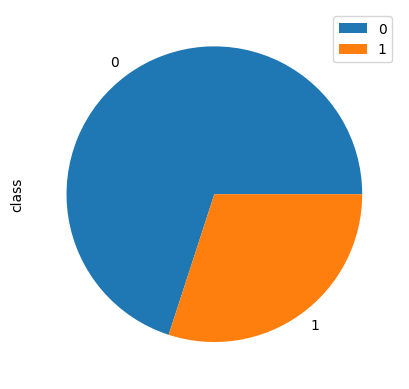

In [ ]:
df['class'].value_counts().plot.pie(legend = ["0", "1"])

In [ ]:
# Đếm số dữ liệu trong mỗi class trong tập train
from collections import Counter
counter = Counter(y)
for k,v in counter.items():
 per = v / len(y) * 100
 print('Class=%d, n=%d (%.3f%%)' % (k, v, per))

Class=0, n=700 (70.000%)
Class=1, n=300 (30.000%)


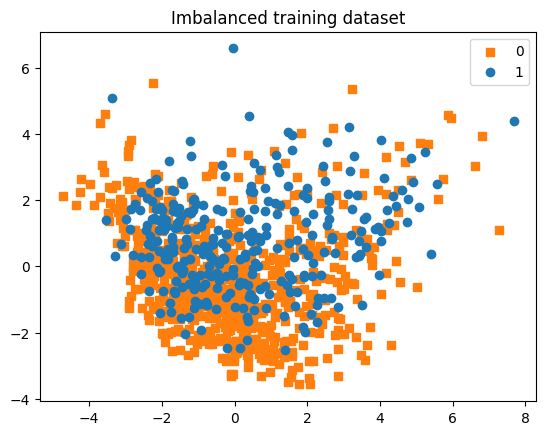

In [ ]:
def plot_2d_space(X, y, label='Classes'):
    colors = [ '#FF7F0E','#1F77B4']
    markers = ['s', 'o']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(X[y==l, 0],X[y==l, 1], c=c, label=l, marker=m)
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()
X_ibl= X
y_ibl= y

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_train_pl = pca.fit_transform(X_ibl)
plot_2d_space(X_train_pl, y_ibl, 'Imbalanced training dataset')

In [ ]:
pip install imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


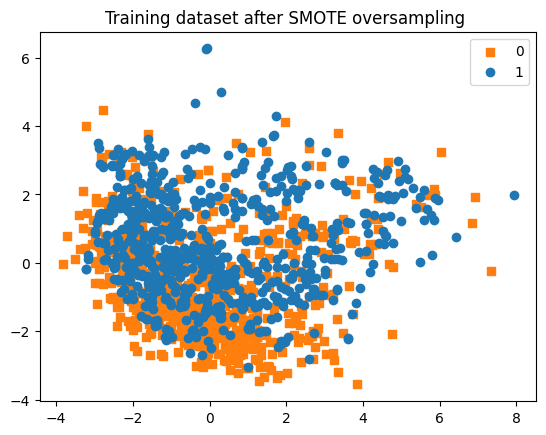

In [ ]:
# Tăng size dữ liệu của 2 class có số lượng sample ít hơn sử dụng Oversampling SMOTE
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_oversampled, y_oversampled = oversample.fit_resample(X_ibl, y_ibl)
pca = PCA(n_components=2)
X_oversampled_pl = pca.fit_transform(X_oversampled)
plot_2d_space(X_oversampled_pl,y_oversampled, 'Training dataset after SMOTE oversampling ')

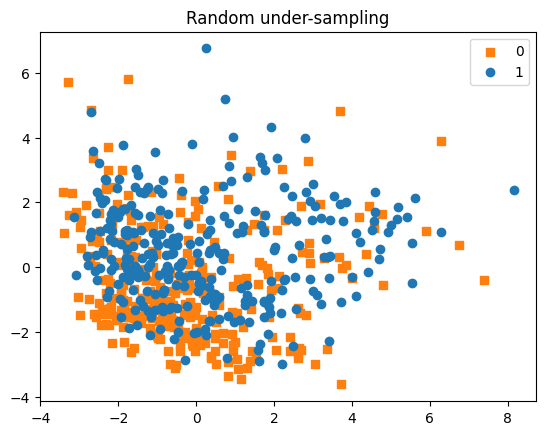

In [ ]:
# Giảm size dữ liệu bằng Random Under Sampler
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_resample(X_ibl, y_ibl)
X_rus_pl = pca.fit_transform(X_rus)
plot_2d_space(X_rus_pl, y_rus, 'Random under-sampling')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


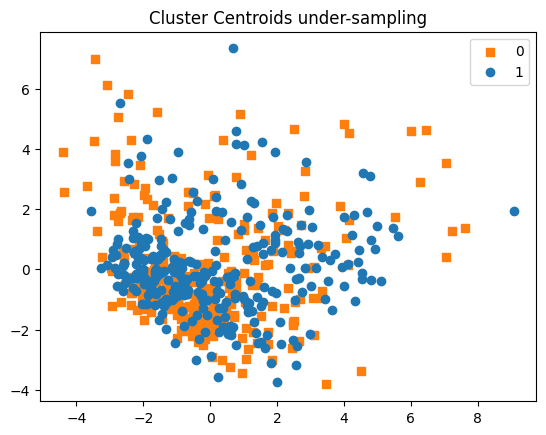

In [ ]:
# Giảm size dữ liệu bằng Cluster Centroids
from imblearn.under_sampling import ClusterCentroids
cc = ClusterCentroids()
X_cc, y_cc = cc.fit_resample(X_ibl, y_ibl)
X_cc_pl = pca.fit_transform(X_cc)
plot_2d_space(X_cc_pl, y_cc, 'Cluster Centroids under-sampling')

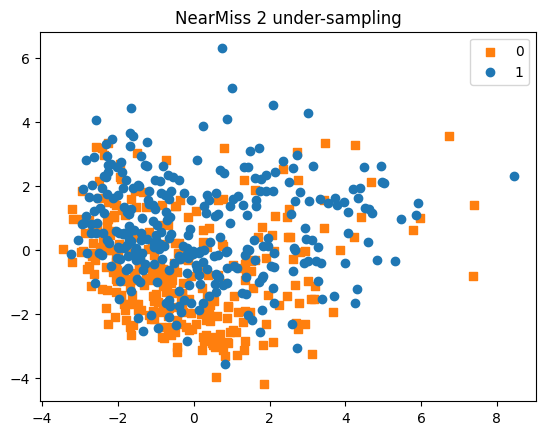

In [ ]:
# Giảm size dữ liệu bằng NearMiss 2
from imblearn.under_sampling import NearMiss
nm = NearMiss(version=2)
X_nm, y_nm = rus.fit_resample(X_ibl, y_ibl)
X_nm_pl = pca.fit_transform(X_nm)
plot_2d_space(X_nm_pl, y_nm, 'NearMiss 2 under-sampling')

### Tối ưu các mô hình và đánh giá độ chính xác
1. Mô hình Logistic Regresion

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from imblearn.over_sampling import SMOTE
from sklearn.metrics import f1_score, classification_report
from sklearn.model_selection import cross_val_score,train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=0)

kf = KFold(n_splits=5)

for fold, (train_index, test_index) in enumerate(kf.split(X), 1):
    X_train = X[train_index]
    y_train = y[train_index]
    X_test = X[test_index]
    y_test = y[test_index]
    sm = SMOTE()
    X_train_oversampled, y_train_oversampled = sm.fit_resample(X_train, y_train)
    model1 = LogisticRegression(C=1.0, penalty= 'l2')
    model1.fit(X_train_oversampled, y_train_oversampled )
    y_pre1 = model1.predict(X_test)
# evaluate predictions
print(classification_report(y_test, y_pre1))

              precision    recall  f1-score   support

           0       0.84      0.73      0.78       139
           1       0.53      0.69      0.60        61

    accuracy                           0.72       200
   macro avg       0.69      0.71      0.69       200
weighted avg       0.75      0.72      0.73       200



In [ ]:
cross_val_score(model1,X_train_oversampled,y_train_oversampled,cv=kf,scoring='recall')

array([0.83333333, 0.734375  , 0.77777778, 0.77272727, 0.69642857])

Validation recall = 0.69 while test recall =0.71

In [ ]:
# defining parameter range
params = {'C':np.logspace(0, 100, 50),
              'penalty':['l1', 'l2']}

grid = GridSearchCV(model1, param_grid=params, cv=kf, scoring='recall').fit(X_train, y_train)
grid.best_params_

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
250 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
250 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: So

{'C': 1.0, 'penalty': 'l2'}

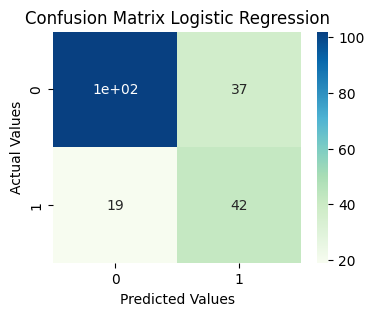

In [ ]:
import seaborn as sns
from sklearn import metrics

cnf_Lr = metrics.confusion_matrix(y_test, y_pre1)
plt.figure(figsize=(4,3))
sns.heatmap(cnf_Lr,annot=True,cmap= 'GnBu')
plt.title('Confusion Matrix Logistic Regression')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

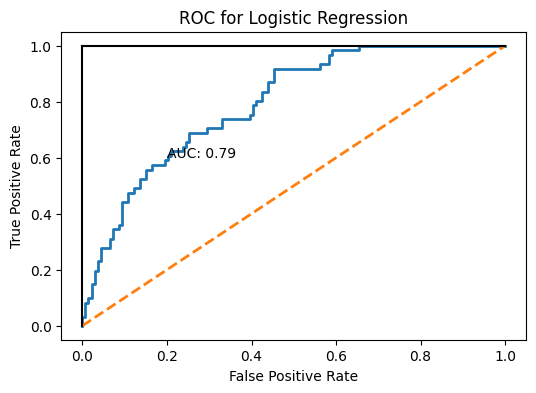

In [ ]:
from sklearn.metrics import roc_auc_score,roc_curve

y_probabilities = model1.predict_proba(X_test)[:,1]
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test,y_probabilities)
plt.figure(figsize=(6,4))
plt.title('ROC for Logistic Regression')
plt.plot(false_positive_rate, true_positive_rate, linewidth=2)
plt.plot([0,1],ls='--',linewidth=2)
plt.plot([0,0],[1,0],c='0')
plt.plot([1,1],c='0')
plt.text(0.2,0.6,'AUC: {:.2f}'.format(roc_auc_score(y_test,y_probabilities)),size= 10)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [ ]:
# Kiểm tra K có độ chính xác tốt nhất
from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=0)
f1=[]
rec=[]
Prec=[] #Tạo list rỗng chứa giá trị của các metrics
X_train_knn= X_train
y_train_knn= y_train
for k in range (1,25):
  knn = KNeighborsClassifier(n_neighbors= k)
  knn.fit(X_train_knn, y_train_knn)
  y_pre2 = knn.predict(X_test)
  f1.append(f1_score(y_test,  y_pre2, average='weighted'))
  rec.append(recall_score(y_test,  y_pre2, average='weighted'))
  Prec.append(precision_score(y_test,  y_pre2, average='weighted'))

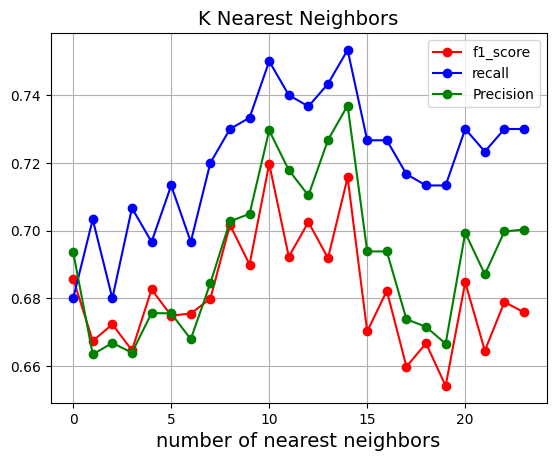

In [ ]:
import matplotlib.pyplot as plt
plt.plot(f1,  color='red', marker='o',label='f1_score')
plt.plot(rec, color='Blue', marker='o',label='recall')
plt.plot(Prec, color='green', marker='o',label='Precision')
plt.title('K Nearest Neighbors', fontsize=14)
plt.xlabel('number of nearest neighbors', fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

Như vậy k=11, k=15 có độ chính xác, f1 và recall tốt nhất. Xét về input dataset có nhiều điểm ouliers nên trong phân tích này cũng sẽ lựa chọn k không quá nhỏ => Chọn k=15

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from imblearn.over_sampling import SMOTE
from sklearn.metrics import f1_score, classification_report
from sklearn.model_selection import cross_val_score,train_test_split

kf = KFold(n_splits=5)
for fold, (train_index, test_index) in enumerate(kf.split(X), 1):
    X_train_knn = X[train_index]
    y_train_knn = y[train_index]
    X_test = X[test_index]
    y_test = y[test_index]
    sm = SMOTE()
    X_train_oversampled, y_train_oversampled = sm.fit_resample(X_train_knn, y_train_knn)
    model_knn = KNeighborsClassifier(n_neighbors=15)
    model_knn.fit(X_train_oversampled, y_train_oversampled )
    y_pred2=model_knn.predict(X_test)
# evaluate predictions
print(classification_report(y_test, y_pred2))


              precision    recall  f1-score   support

           0       0.88      0.58      0.70       139
           1       0.46      0.82      0.59        61

    accuracy                           0.65       200
   macro avg       0.67      0.70      0.64       200
weighted avg       0.75      0.65      0.66       200



In [ ]:
cross_val_score(model_knn,X_train_oversampled,y_train_oversampled,cv=kf,scoring='recall')

array([0.88333333, 0.921875  , 0.90123457, 0.86363636, 0.68303571])

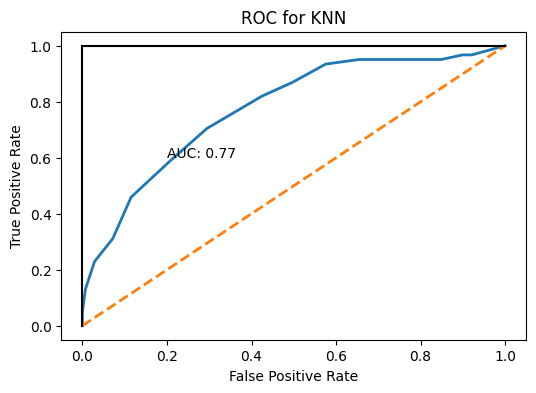

In [ ]:
from sklearn.metrics import roc_auc_score,roc_curve

y_probaknn = model_knn.predict_proba(X_test)[:,1]
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test,y_probaknn)
plt.figure(figsize=(6,4))
plt.title('ROC for KNN')
plt.plot(false_positive_rate, true_positive_rate, linewidth=2)
plt.plot([0,1],ls='--',linewidth=2)
plt.plot([0,0],[1,0],c='0')
plt.plot([1,1],c='0')
plt.text(0.2,0.6,'AUC: {:.2f}'.format(roc_auc_score(y_test,y_probaknn)),size= 10)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

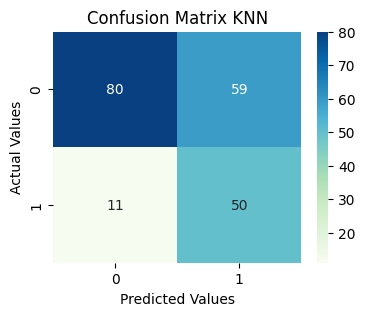

In [ ]:
import seaborn as sns
from sklearn import metrics

cnf_knn = metrics.confusion_matrix(y_test, y_pred2)
plt.figure(figsize=(4,3))
sns.heatmap(cnf_knn,annot=True,cmap='GnBu')
plt.title('Confusion Matrix KNN')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

2. Mô hình Decision Tree

In [ ]:
#Training mô hình Decision Tree
from sklearn import tree
from sklearn.model_selection import KFold
from imblearn.over_sampling import SMOTE
from sklearn.metrics import f1_score, classification_report
from sklearn.model_selection import cross_val_score,train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=0)
kf = KFold(n_splits=5)
for fold, (train_index, test_index) in enumerate(kf.split(X), 1):
    Xtree_train = X[train_index]
    ytree_train = y[train_index]
    X_test = X[test_index]
    y_test = y[test_index]
    sm = SMOTE()
    X_train_oversampled, y_train_oversampled = sm.fit_resample(X_train, y_train)
    model_tree = tree.DecisionTreeClassifier(criterion= 'entropy', max_depth=40)
    model_tree.fit(X_train_oversampled, y_train_oversampled )
    ytree_pred=model_tree.predict(X_test)
# evaluate predictions
print(classification_report(y_test, ytree_pred))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95       139
           1       0.84      0.97      0.90        61

    accuracy                           0.94       200
   macro avg       0.91      0.94      0.93       200
weighted avg       0.94      0.94      0.94       200



In [ ]:
cross_val_score(model_tree,X_train_oversampled,y_train_oversampled,cv=kf,scoring='recall')

array([0.54098361, 0.62295082, 0.54901961, 0.81512605, 0.92268041])

Validation recall= 0.92 vs test recall = 0.94

Tìm tham số tốt nhất cho model decision tree

In [ ]:
tree_para = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}
clf = GridSearchCV(model_tree, tree_para, cv=5)
clf.fit(X_train, y_train)
clf.best_params_

{'criterion': 'entropy', 'max_depth': 40}

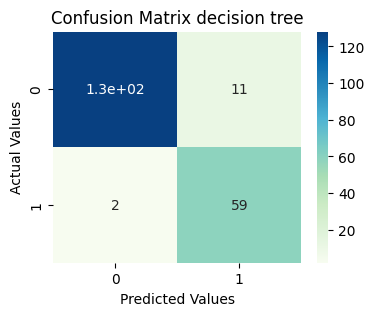

In [ ]:
import seaborn as sns
from sklearn import metrics

cnf_tree = metrics.confusion_matrix(y_test, ytree_pred)
plt.figure(figsize=(4,3))
sns.heatmap(cnf_tree,annot=True,cmap= 'GnBu')
plt.title('Confusion Matrix decision tree')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

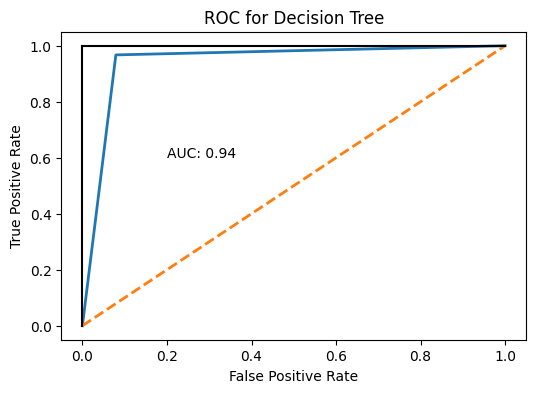

In [ ]:
from sklearn.metrics import roc_auc_score,roc_curve

y_probatree = model_tree.predict_proba(X_test)[:,1]
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test,y_probatree)
plt.figure(figsize=(6,4))
plt.title('ROC for Decision Tree')
plt.plot(false_positive_rate, true_positive_rate, linewidth=2)
plt.plot([0,1],ls='--',linewidth=2)
plt.plot([0,0],[1,0],c='0')
plt.plot([1,1],c='0')
plt.text(0.2,0.6,'AUC: {:.2f}'.format(roc_auc_score(y_test,y_probatree)),size= 10)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

3. Mô hình Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=0)
kf = KFold(n_splits=5)
for fold, (train_index, test_index) in enumerate(kf.split(X), 1):
    Xforest_train = X[train_index]
    yforest_train = y[train_index]
    X_test = X[test_index]
    y_test = y[test_index]
    sm = SMOTE()
    X_train_oversampled, y_train_oversampled = sm.fit_resample(Xforest_train, yforest_train)
    random_forest = RandomForestClassifier(max_depth= 10, n_estimators= 200, random_state= 13)
    random_forest.fit(X_train_oversampled, y_train_oversampled )
    yforest_pred = random_forest.predict(X_test)
# evaluate predictions
print(classification_report(y_test, yforest_pred))


              precision    recall  f1-score   support

           0       0.82      0.86      0.84       139
           1       0.63      0.56      0.59        61

    accuracy                           0.77       200
   macro avg       0.72      0.71      0.71       200
weighted avg       0.76      0.77      0.76       200



In [ ]:
cross_val_score(random_forest,X_train_oversampled,y_train_oversampled,cv=kf,scoring='recall')

array([0.7       , 0.6875    , 0.64197531, 0.87121212, 0.96875   ])

Validation recall=0.96 while test recall= 0.76

In [ ]:
forest_params= {'n_estimators': [50, 100, 200],
 'max_depth': [2,4, 6, 10, 12],
 'random_state': [13]}
fr= GridSearchCV(random_forest, forest_params, cv=5)
fr.fit(X_train, y_train)
fr.best_params_

{'max_depth': 10, 'n_estimators': 200, 'random_state': 13}

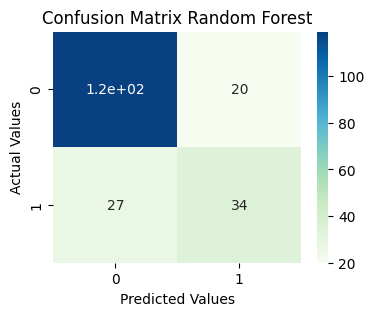

In [ ]:
import seaborn as sns
from sklearn import metrics
cnf_forest = metrics.confusion_matrix(y_test, yforest_pred)
plt.figure(figsize=(4,3))
sns.heatmap(cnf_forest,annot=True, cmap='GnBu')
plt.title('Confusion Matrix Random Forest')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

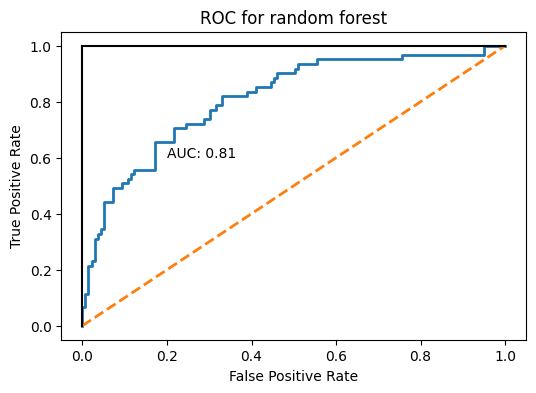

In [ ]:
from sklearn.metrics import roc_auc_score,roc_curve

y_probforest = random_forest.predict_proba(X_test)[:,1]
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test,y_probforest)
plt.figure(figsize=(6,4))
plt.title('ROC for random forest')
plt.plot(false_positive_rate, true_positive_rate, linewidth=2)
plt.plot([0,1],ls='--',linewidth=2)
plt.plot([0,0],[1,0],c='0')
plt.plot([1,1],c='0')
plt.text(0.2,0.6,'AUC: {:.2f}'.format(roc_auc_score(y_test,y_probforest)),size= 10)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

4. Mô hình Gaussian Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=0)
kf = KFold(n_splits=5)
for fold, (train_index, test_index) in enumerate(kf.split(X), 1):
    X_NB = X[train_index]
    y_NB = y[train_index]
    X_test = X[test_index]
    y_test = y[test_index]
    sm = SMOTE()
    X_train_oversampled, y_train_oversampled = sm.fit_resample(X_NB, y_NB)
    GNB = GaussianNB(var_smoothing= 1.0) #Gán mô hình từ thư viện vào biến GNB
    GNB.fit(X_train_oversampled, y_train_oversampled )
    yNB_pred=GNB.predict(X_test) #Dự báo
# evaluate predictions
print(classification_report(y_test, yNB_pred))


              precision    recall  f1-score   support

           0       0.90      0.51      0.65       139
           1       0.44      0.87      0.58        61

    accuracy                           0.62       200
   macro avg       0.67      0.69      0.62       200
weighted avg       0.76      0.62      0.63       200



In [ ]:
cross_val_score(GNB,X_train_oversampled,y_train_oversampled,cv=kf,scoring='recall')

array([0.91666667, 0.890625  , 0.92592593, 0.90909091, 0.78125   ])

validation recall= 0.78 while test recall = 0.63

In [ ]:
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

gs_NB = GridSearchCV(GNB, params_NB, cv=5)
gs_NB.fit(X_train, y_train)
gs_NB.best_params_

{'var_smoothing': 1.0}

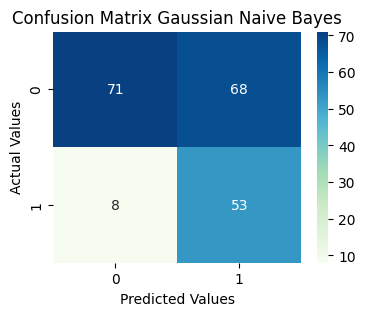

In [ ]:
import seaborn as sns
from sklearn import metrics

cnf_NB = metrics.confusion_matrix(y_test, yNB_pred)
plt.figure(figsize=(4,3))
sns.heatmap(cnf_NB,annot=True,cmap= 'GnBu')
plt.title('Confusion Matrix Gaussian Naive Bayes')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

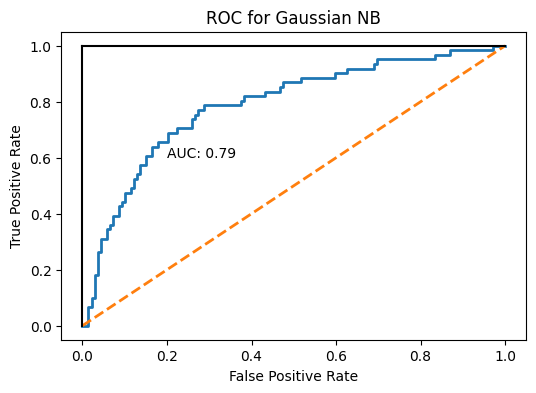

In [ ]:
from sklearn.metrics import roc_auc_score,roc_curve

y_probNB = GNB.predict_proba(X_test)[:,1]
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test,y_probNB)
plt.figure(figsize=(6,4))
plt.title('ROC for Gaussian NB')
plt.plot(false_positive_rate, true_positive_rate, linewidth=2)
plt.plot([0,1],ls='--',linewidth=2)
plt.plot([0,0],[1,0],c='0')
plt.plot([1,1],c='0')
plt.text(0.2,0.6,'AUC: {:.2f}'.format(roc_auc_score(y_test,y_probNB)),size= 10)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()